In [132]:
# from pythainlp import word_tokenize
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# from pythainlp.word_vector import thai2vec 
import numpy as np
import pandas as pd
%reload_ext autoreload
%autoreload 2
# %matplotlib inline

from pythainlp.tokenize import word_tokenize
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.cluster import hierarchy
import dill as pickle
import pandas as pd
import pythainlp.word_vector
# model = word_vector.get_model()
model_path = 'thwiki_data/models/'

In [133]:
# thai2dict = {}
# for word in model.index2word:
#     thai2dict[word] = model[word]
# thai2vec = pd.DataFrame.from_dict(thai2dict,orient='index')
# thai2vec.head(10)

In [134]:
text = ["ลองตัดคำดูก่อน", "จะได้ไหมนะ","ทดสอบการตัด" , "ตัดคำในภาษาไทย", "ตัดได้จริงไหม", "ตัดคำได้ด้วยอะ", "วันนี้กินข้าวอะไร", "กินก๋วยเตี๋ยว", "กินก๋วยเตี๋ยว", "กินก๋วยเตี๋ยว" ,"ไปกินอาหารกันไหม", "ไม่อยากกินแล้วอะ"]
# text = ["วันนี้กินกะเพรา", "วันนี้กินก๋วยเตี๋ยว", "วันนี้ไปกินน้ำส้มกัน", "เล่นเกมปะ"
#        ,"ไม่ชอบกินก๋วยเตี๋ยวเลย", "ผมชอบไปกินข้าวผัด", "ชอบเล่นเกม","ชอบเล่นฮีโรในแอล",
#         ]
# text = ["this is the learning good deep good book", "this is another book", "one more book", "train railway station", "time train station", "time railway station train", "this is the new post", "this is about more deep learning post", "and this is the one"]
# text = ["ผมเป็นนักศึกษาเรียนที่มหาวิทยาลัยขอนแก่น","ผมเป็นนักศึกษามหาวิทยาลัยขอนแก่น","ผมเป็นนักศึกษามหาวิทยาลัยขอนแก่น","ผมเป็นนักศึกษามหาวิทยาลัยขอนแก่น","วันนี้กินข้าวอะไร", "กินก๋วยเตี๋ยว"]

In [135]:
sentences = []
# for y in text:
#     proc = y.split()
#     sentences.append(proc)
# print(sentences)
for x in text:
    proc = word_tokenize(x, engine='newmm')
#     textafter.append(proc)
    sentences.append(proc)
print(sentences)
model = pythainlp.word_vector.get_model()

[['ลอง', 'ตัด', 'คำ', 'ดูก่อน'], ['จะ', 'ได้', 'ไหม', 'นะ'], ['ทดสอบ', 'การ', 'ตัด'], ['ตัด', 'คำ', 'ใน', 'ภาษาไทย'], ['ตัด', 'ได้', 'จริง', 'ไหม'], ['ตัด', 'คำ', 'ได้', 'ด้วย', 'อะ'], ['วันนี้', 'กินข้าว', 'อะไร'], ['กิน', 'ก๋วยเตี๋ยว'], ['กิน', 'ก๋วยเตี๋ยว'], ['กิน', 'ก๋วยเตี๋ยว'], ['ไป', 'กิน', 'อาหาร', 'กัน', 'ไหม'], ['ไม่', 'อยาก', 'กิน', 'แล้ว', 'อะ']]


In [136]:
def sentence_vectorizer(ss,dim=300,use_mean=True): # ประกาศฟังก์ชัน sentence_vectorizer
    s = word_tokenize(ss)
    vec = np.zeros((1,dim))
    for word in s:
        if word in model.wv.index2word:
            vec+= model.wv.word_vec(word)
        else: pass
    if use_mean: vec /= len(s)
    return vec

l = []
c = 0
for i in text:
    l.append(sentence_vectorizer(i)[0])
#     if(c==0):
#         print(sentence_vectorizer(i)[0])
#     c+=1
X=np.array(l)
# print(l)

# m = Word2Vec(sentences, size=50, min_count=1, sg=1)
# def vectorizer(sent,m):
#     vec = []
#     numw = 0
#     for w in sent:
#         try:
#             if numw == 0:
#                 vec = m[w]
#             else:
#                 vec = np.add(vec, m[w])
#             numw+=1
#         except:
#             pass
#         return np.asarray(vec) / numw
# l = []
# c=0
# for i in sentences:
#     l.append(vectorizer(i, m))
# #     if(c==0):
# #         print(vectorizer(i,m))
# #     c+=1
# X=np.array(l)
# print(X)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [137]:
def sentence_similarity(s1,s2):
    return cosine_similarity(sentence_vectorizer(str(s1)),sentence_vectorizer(str(s2)))
sentence_similarity("วันนี้กินกระเพรา", "ไปเชียงใหม่")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


array([[0.23502779]])

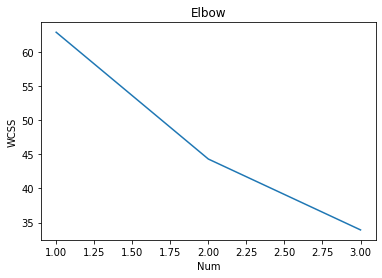

In [138]:
import matplotlib.pyplot as plt
wcss = []
for i in range(1,4):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,4), wcss)
plt.title('Elbow')
plt.xlabel('Num')
plt.ylabel('WCSS')
plt.show()
    
    

In [139]:
n_clusters = 2
clf = KMeans(n_clusters=n_clusters,
            max_iter=100,
            init='k-means++',
            n_init=1)
labels = clf.fit_predict(X)
print(labels)
for index, sentence in enumerate(sentences):
    print(str(labels[index]) + ":" + str(sentence))

[0 0 0 0 0 0 1 1 1 1 1 1]
0:['ลอง', 'ตัด', 'คำ', 'ดูก่อน']
0:['จะ', 'ได้', 'ไหม', 'นะ']
0:['ทดสอบ', 'การ', 'ตัด']
0:['ตัด', 'คำ', 'ใน', 'ภาษาไทย']
0:['ตัด', 'ได้', 'จริง', 'ไหม']
0:['ตัด', 'คำ', 'ได้', 'ด้วย', 'อะ']
1:['วันนี้', 'กินข้าว', 'อะไร']
1:['กิน', 'ก๋วยเตี๋ยว']
1:['กิน', 'ก๋วยเตี๋ยว']
1:['กิน', 'ก๋วยเตี๋ยว']
1:['ไป', 'กิน', 'อาหาร', 'กัน', 'ไหม']
1:['ไม่', 'อยาก', 'กิน', 'แล้ว', 'อะ']


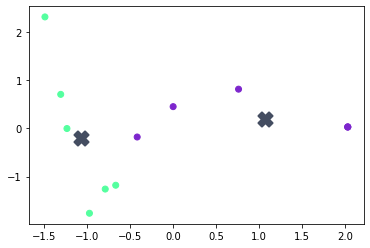

In [140]:
pca  = PCA(n_components=2).fit(X)
coords = pca.transform(X)
label_colors = ["#54FF9F", "#7D26CD", "#794044", "#F4E628"]
colors = [label_colors[i] for i in labels]
plt.scatter(coords[:, 0], coords[:, 1], c=colors)
centroids = clf.cluster_centers_
centroid_coords = pca.transform(centroids)
plt.scatter(centroid_coords[:, 0], centroid_coords[:, 1], marker='X', s=200, linewidths=2, c='#444d61')
plt.show()

In [141]:
# x = sentence_vectorizer("งงจังครับ")
l = []
c = 0
# for i in text:
l.append(sentence_vectorizer("ชอบเล่นเกม")[0])
#     if(c==0):
#         print(sentence_vectorizer(i)[0])
#     c+=1
KL=np.array(l)
clf.predict(KL)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


array([1], dtype=int32)

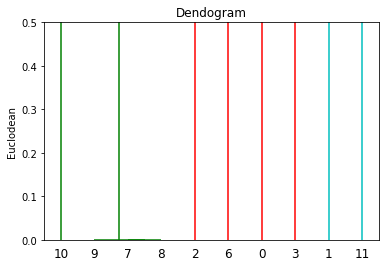

In [142]:
Z = hierarchy.linkage(X, 'ward')
dn = hierarchy.dendrogram(Z)
plt.title('Dendogram')
plt.ylabel('Euclodean')
plt.xlim(0,100)
plt.ylim(0,0.5)
plt.show()

In [143]:
hc = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                            linkage='ward')
y_hc= hc.fit_predict(X)
print(y_hc)
for index, sentence in enumerate(sentences):
    print(str(y_hc[index]) + ":" + str(sentence))

[0 0 0 0 0 0 0 1 1 1 1 0]
0:['ลอง', 'ตัด', 'คำ', 'ดูก่อน']
0:['จะ', 'ได้', 'ไหม', 'นะ']
0:['ทดสอบ', 'การ', 'ตัด']
0:['ตัด', 'คำ', 'ใน', 'ภาษาไทย']
0:['ตัด', 'ได้', 'จริง', 'ไหม']
0:['ตัด', 'คำ', 'ได้', 'ด้วย', 'อะ']
0:['วันนี้', 'กินข้าว', 'อะไร']
1:['กิน', 'ก๋วยเตี๋ยว']
1:['กิน', 'ก๋วยเตี๋ยว']
1:['กิน', 'ก๋วยเตี๋ยว']
1:['ไป', 'กิน', 'อาหาร', 'กัน', 'ไหม']
0:['ไม่', 'อยาก', 'กิน', 'แล้ว', 'อะ']
